Przypomnienie wstępne metody gradientowej i metody sprzęzonych gradientów.

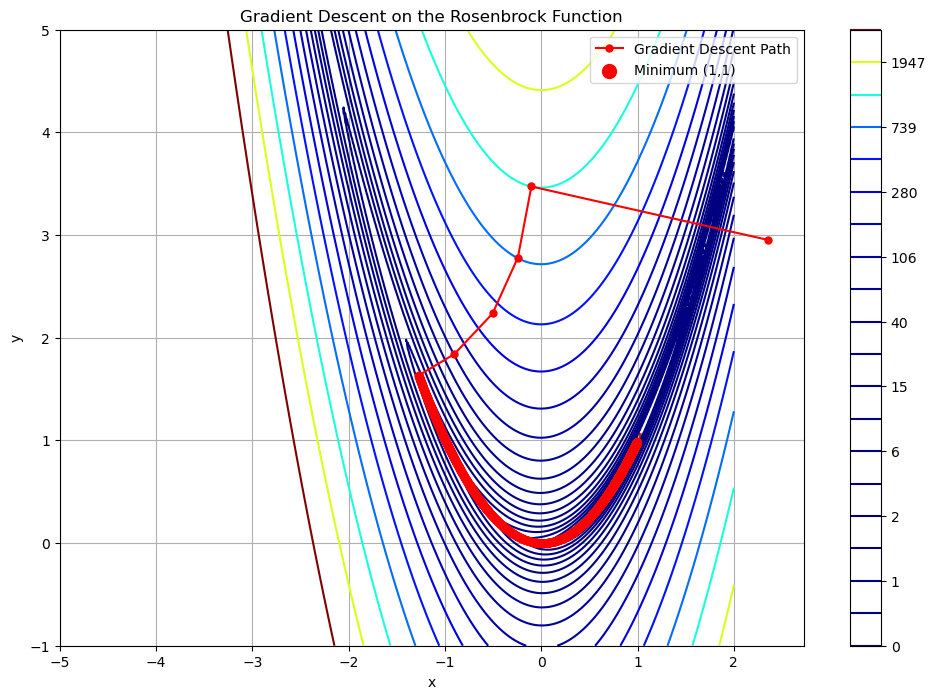

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function
def rosenbrock(x, y, a=1, b=100):
    return (a - x) ** 2 + b * (y - x**2) ** 2

# Partial derivatives of the Rosenbrock function
def rosenbrock_grad(x, y, a=1, b=100):
    df_dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    df_dy = 2 * b * (y - x**2)
    return np.array([df_dx, df_dy])

# Gradient Descent Function for 2D
def gradient_descent_2d(starting_point, learning_rate, num_iterations):
    point = np.array(starting_point, dtype=np.float64)
    history = []

    for _ in range(num_iterations):
        grad = rosenbrock_grad(point[0], point[1])
        point -= learning_rate * grad
        history.append(point.copy())

    return point, np.array(history)

# Parameters
starting_point = [-2.6, 2]  # A challenging starting point
learning_rate = 0.001
num_iterations = 10000

# Run Gradient Descent
min_point, history = gradient_descent_2d(starting_point, learning_rate, num_iterations)

# Plotting the results
x = np.linspace(-5, 2, 400)
y = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.figure(figsize=(12, 8))
cp = plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20, base=10), cmap='jet')
plt.colorbar(cp)
plt.plot(history[:, 0], history[:, 1], marker='o', color='red', markersize=5, linestyle='-', label='Gradient Descent Path')
plt.title('Gradient Descent on the Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(1, 1, c='red', s=100, label='Minimum (1,1)')
plt.legend()
plt.grid(True)
plt.show()

Fletcher-Reeves beta approximation

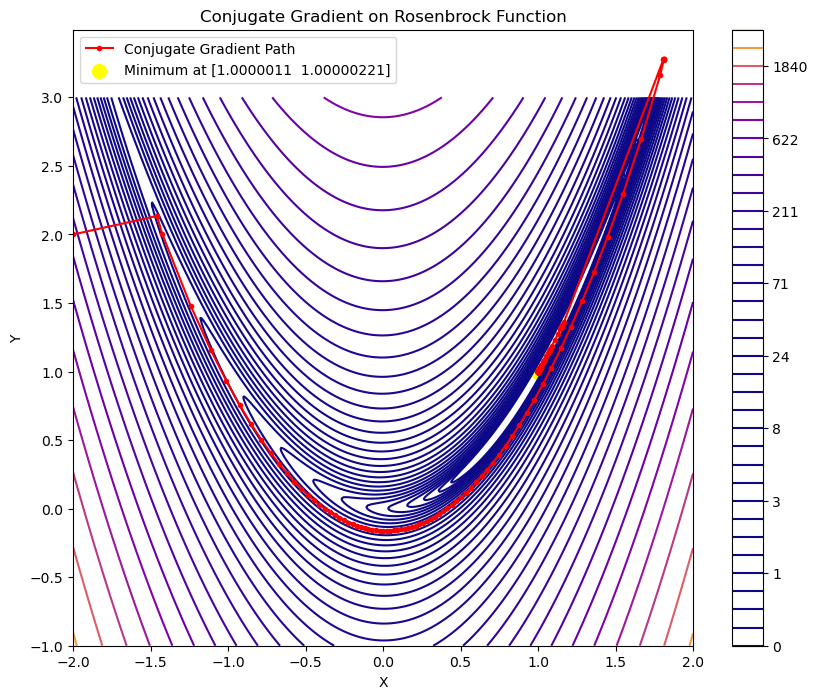

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Rosenbrock function
def rosenbrock(x, a=1, b=100):
    return (a - x[0]) ** 2 + b * (x[1] - x[0] ** 2) ** 2

# Gradient of the Rosenbrock function
def rosenbrock_grad(x, a=1, b=100):
    df_dx = -2 * (a - x[0]) - 4 * b * x[0] * (x[1] - x[0]**2)
    df_dy = 2 * b * (x[1] - x[0]**2)
    return np.array([df_dx, df_dy])

# Conjugate Gradient Algorithm with line search for the Rosenbrock function
def conjugate_gradient_rosenbrock(initial_point, a=1, b=100, tolerance=1e-6, max_iterations=1000):
    x = np.array(initial_point, dtype=float)
    r = -rosenbrock_grad(x, a, b)
    p = r.copy()
    history = [x.copy()]
    
    for i in range(max_iterations):
        def obj_func(alpha):
            return rosenbrock(x + alpha * p, a, b)
        
        res = minimize(obj_func, 0.001, bounds=[(None, None)])
        alpha = res.x
        
        x += alpha * p
        history.append(x.copy())
        r_new = -rosenbrock_grad(x, a, b)
        
        if np.linalg.norm(r_new) < tolerance:
            break
        
        beta =  np.dot(r_new, r_new / np.dot(r, r))
        p = r_new + beta * p
        r = r_new
        
    return x, np.array(history)

# Initial guess
initial_point = [-2, 2]

# Run the optimization
solution, history = conjugate_gradient_rosenbrock(initial_point)

# Plotting the results
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(np.array([X, Y]))

plt.figure(figsize=(10, 8))
cp = plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 35, base=10), cmap='plasma')
plt.colorbar(cp)
plt.plot(history[:, 0], history[:, 1], 'r.-', label='Conjugate Gradient Path')
plt.scatter(solution[0], solution[1], color='yellow', s=100, label=f'Minimum at {solution}')
plt.title('Conjugate Gradient on Rosenbrock Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Polak-Ribière beta approximation 

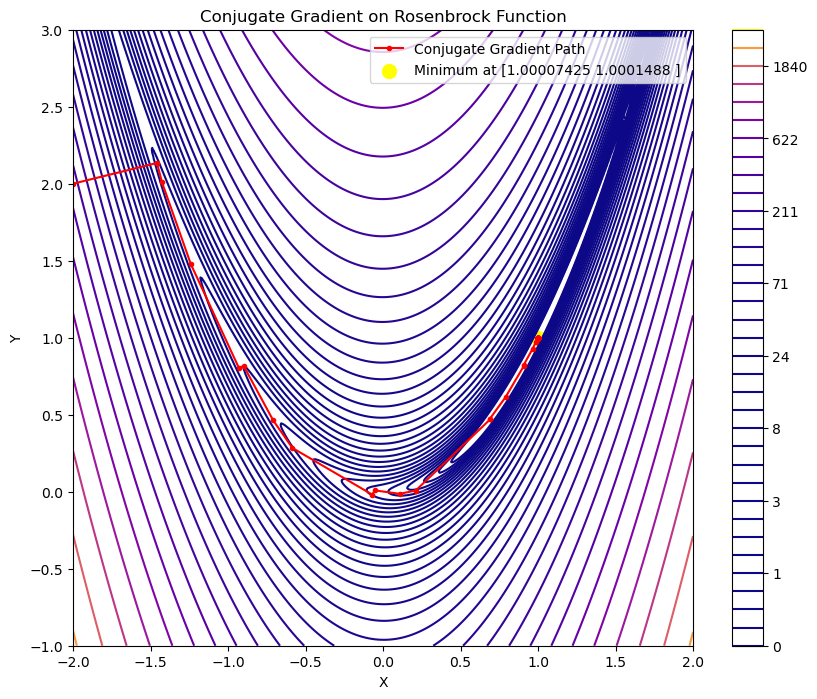

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Rosenbrock function
def rosenbrock(x, a=1, b=100):
    return (a - x[0]) ** 2 + b * (x[1] - x[0] ** 2) ** 2

# Gradient of the Rosenbrock function
def rosenbrock_grad(x, a=1, b=100):
    df_dx = -2 * (a - x[0]) - 4 * b * x[0] * (x[1] - x[0]**2)
    df_dy = 2 * b * (x[1] - x[0]**2)
    return np.array([df_dx, df_dy])

# Conjugate Gradient Algorithm with line search for the Rosenbrock function
def conjugate_gradient_rosenbrock(initial_point, a=1, b=100, tolerance=1e-6, max_iterations=1000):
    x = np.array(initial_point, dtype=float)
    r = -rosenbrock_grad(x, a, b)
    p = r.copy()
    history = [x.copy()]
    
    for i in range(max_iterations):
        def obj_func(alpha):
            return rosenbrock(x + alpha * p, a, b)
        
        res = minimize(obj_func, 0.001, bounds=[(None, None)])
        alpha = res.x
        
        x += alpha * p
        history.append(x.copy())
        r_new = -rosenbrock_grad(x, a, b)
        
        if np.linalg.norm(r_new) < tolerance:
            break
        
        beta = max(0, np.dot(r_new, (r_new - r)) / np.dot(r, r))
        p = r_new + beta * p
        r = r_new
        
    return x, np.array(history)

# Initial guess
initial_point = [-2, 2]

# Run the optimization
solution, history = conjugate_gradient_rosenbrock(initial_point)

# Plotting the results
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(np.array([X, Y]))

plt.figure(figsize=(10, 8))
cp = plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 35, base=10), cmap='plasma')
plt.colorbar(cp)
plt.plot(history[:, 0], history[:, 1], 'r.-', label='Conjugate Gradient Path')
plt.scatter(solution[0], solution[1], color='yellow', s=100, label=f'Minimum at {solution}')
plt.title('Conjugate Gradient on Rosenbrock Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Adagrad

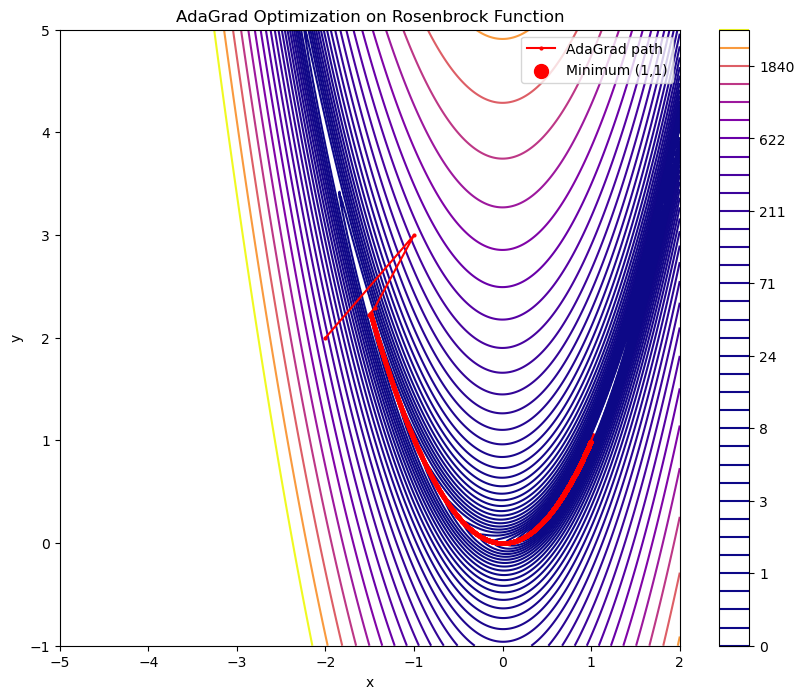

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# Define the Rosenbrock function
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2
# Define the gradient of the Rosenbrock function
def rosenbrock_grad(x, y, a=1, b=100):
    df_dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    df_dy = 2 * b * (y - x**2)
    return np.array([df_dx, df_dy])
# Implement AdaGrad algorithm
def adagrad(f, grad_f, init, lr=0.1, max_iter=1000, epsilon=1e-8):
    x = np.array(init, dtype=float)
    history = [x.copy()]
    gradient_accumulate = np.zeros_like(x)
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        gradient_accumulate += grad**2
        adjusted_lr = lr / (np.sqrt(gradient_accumulate) + epsilon)
        x -= adjusted_lr * grad
        history.append(x.copy())
    return np.array(history)
# Initial parameters
initial_position = [-2, 2]
learning_rate = 1.0
iterations = 10000
# Run AdaGrad
trajectory = adagrad(rosenbrock, rosenbrock_grad, initial_position, lr=learning_rate, max_iter=iterations)
# Plotting the results
x_range = np.linspace(-5, 2, 400)
y_range = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(X, Y)
plt.figure(figsize=(10, 8))
cp = plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 35, base=10), cmap='plasma')
plt.colorbar(cp)
plt.plot(trajectory[:, 0], trajectory[:, 1], color='red', marker='o', markersize=2, label='AdaGrad path')
plt.scatter(1, 1, c='red', s=100, label='Minimum (1,1)')
plt.title('AdaGrad Optimization on Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

AdaDelta

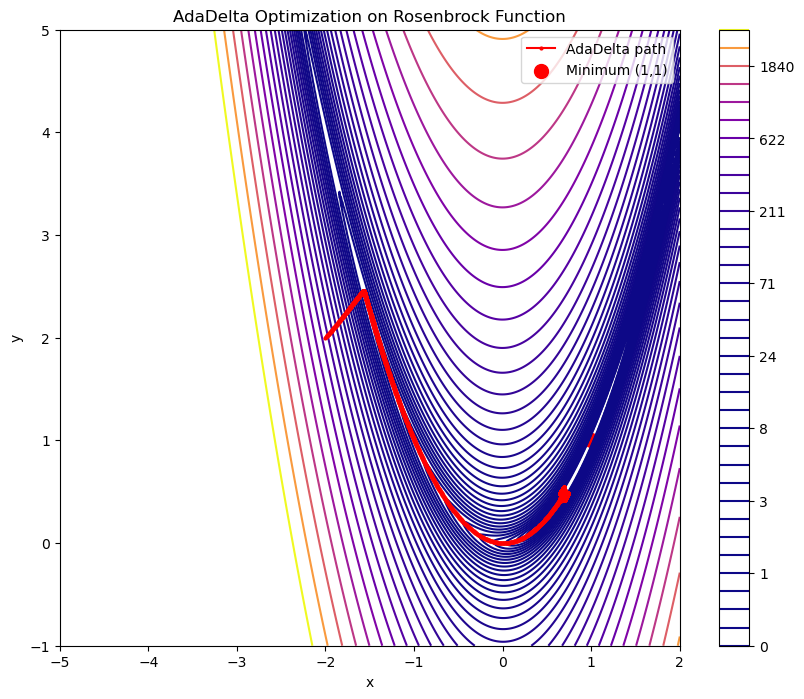

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

# Define the gradient of the Rosenbrock function
def rosenbrock_grad(x, y, a=1, b=100):
    df_dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    df_dy = 2 * b * (y - x**2)
    return np.array([df_dx, df_dy])

# Implement AdaDelta algorithm
def adadelta(f, grad_f, init, rho=0.95, max_iter=1000, epsilon=1e-6):
    x = np.array(init, dtype=float)
    history = [x.copy()]
    accum_grad = np.zeros_like(x)
    accum_update = np.zeros_like(x)
    
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        accum_grad = rho * accum_grad + (1 - rho) * grad**2
        update = (np.sqrt(accum_update + epsilon) / np.sqrt(accum_grad + epsilon)) * grad
        accum_update = rho * accum_update + (1 - rho) * update**2
        x -= update
        history.append(x.copy())
    
    return np.array(history)

# Initial parameters
initial_position = [-2, 2]
iterations = 10000

# Run AdaDelta
trajectory = adadelta(rosenbrock, rosenbrock_grad, initial_position, max_iter=iterations)

# Plotting the results
x_range = np.linspace(-5, 2, 400)
y_range = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(X, Y)
plt.figure(figsize=(10, 8))
cp = plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 35, base=10), cmap='plasma')
plt.colorbar(cp)
plt.plot(trajectory[:, 0], trajectory[:, 1], color='red', marker='o', markersize=2, label='AdaDelta path')
plt.scatter(1, 1, c='red', s=100, label='Minimum (1,1)')
plt.title('AdaDelta Optimization on Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()